In [1]:
from __future__ import annotations

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm

import gymnasium as gym

env = gym.make("CartPole-v1")

In [2]:
# reset the environment to get the first observation
done = False
observation, info = env.reset()


In [3]:
action = env.action_space.sample()
observation, reward, terminated, truncated, info = env.step(action)
print(observation)
print(reward)
print(terminated)
print(truncated)
print(info)

max_speed = -1
min_speed = 1
max_angular_speed = -1
min_angular_speed = 1

[-0.01153458  0.22524959  0.02401358 -0.24637948]
1.0
False
False
{}


In [4]:
#Testing a random agent's performance
n_episodes = 10000
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        # update the statistics
        if obs[1] > max_speed:
            max_speed = obs[1]
        if obs[1] < min_speed:
            min_speed = obs[1]
        if obs[3] > max_angular_speed:
            max_angular_speed = obs[3]
        if obs[3] < min_angular_speed:
            min_angular_speed = obs[3]
        #action = agent.get_action(obs)
        action = env.action_space.sample()
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        #agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    #agent.decay_epsilon()


100%|██████████| 10000/10000 [00:02<00:00, 3800.29it/s]


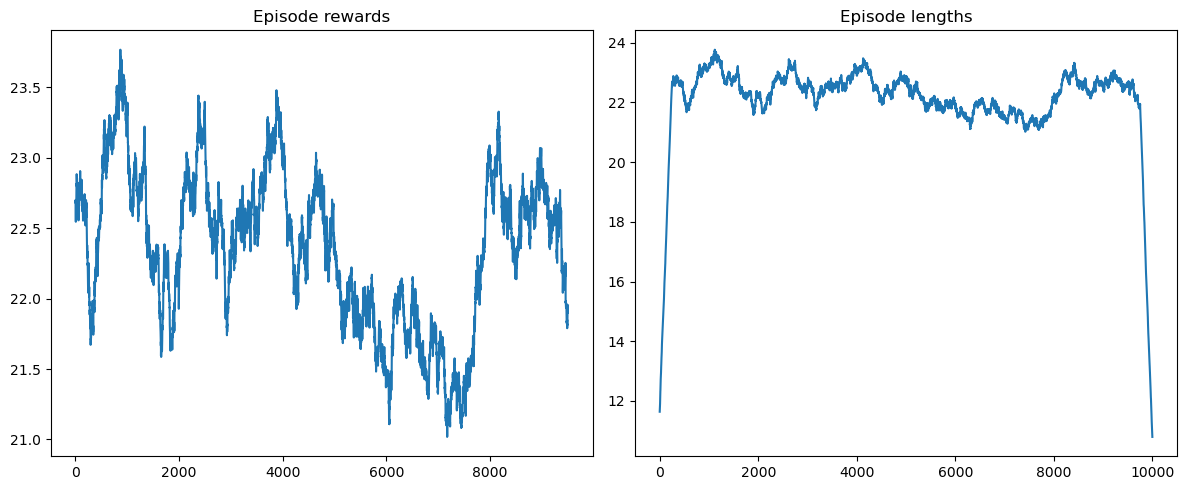

In [5]:
#Visualize (not) training
rolling_length = 500
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
# axs[2].set_title("Training Error")
# training_error_moving_average = (
#     np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
#     / rolling_length
# )
# axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
plt.tight_layout()
plt.show()

In [6]:
print("Max speed: ", max_speed)
print("Min speed: ", min_speed)
print("Max angular speed: ", max_angular_speed)
print("Min angular speed: ", min_angular_speed)

Max speed:  2.687817
Min speed:  -2.8649702
Max angular speed:  2.948726
Min angular speed:  -3.1970835
